In [254]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft

def twiddles(N):
    return np.fromfunction(lambda k: np.exp(-2*np.pi*k*1j/N), (N//2,))

def inv_DITfft(x):
    N = len(x)
    assert N & (N-1) == 0
    n = N >> 1
    w = twiddles(N)
    i = N
    t = 0
    while i > 1:
        i >>= 1
        t += 1
    # permutation = np.array([int(bin(i)[2:].rjust(t, "0")[::-1], 2) for i in np.arange(N)])
    # x[:] = x[permutation]
    for p in range(1, t+1):
        l = 1 << p
        # l = N >> (p-1)
        s = l >> 1
        for i in range(n):
            k = i // s
            u = i % s
            Q = (i * (N>>p)) % n
            # Q = (i * (1<<(p-1))) % n
            upper_butter = k*l + u
            lower_butter = k*l + u + s
            tau = np.conj(w[Q]) * x[lower_butter]
            # lower_value = x[lower_butter]
            # upper_value = x[upper_butter]
            x[lower_butter] = x[upper_butter] - tau
            x[upper_butter] = x[upper_butter] + tau
            # if p == 3:
            #     print(f"{i = }")
            #     # print(w[Q])
            #     print(f"{Q = }")
            #     print()
    
    return x


def DIFfft(x):
    N = len(x)
    assert N & (N-1) == 0
    n = N >> 1
    w = twiddles(N)
    i = N
    t = 0
    while i > 1:
        i >>= 1
        t += 1
    # permutation = np.array([int(bin(i)[2:].rjust(t, "0")[::-1], 2) for i in np.arange(N)])
    # x[:] = x[permutation]
    for p in range(1, t+1):
        # p = 
        l = N >> (p-1)
        s = l >> 1
        for i in range(n):
            k = i // s
            u = i % s
            # Q = (i * (N>>p)) % n
            Q = (i * (1<<(p-1))) % n
            # Q = (i * (s) % n)
            upper_butter = k*l + u
            lower_butter = k*l + u + s
            # tau = w[Q] * x[lower_butter]
            lower_value = x[lower_butter]
            upper_value = x[upper_butter]
            x[upper_butter] = upper_value + lower_value
            x[lower_butter] = (upper_value - lower_value) * w[Q]
            # if p == 3:
            #     print(f"{i = }")
            #     # print(w[Q])
            #     print(f"{Q = }")
            #     print()
    
    return x

In [255]:
import tifffile
idk = tifffile.imread("grey_lion.tiff")

In [262]:
with open("out.bin", "rb") as file:
    data = np.frombuffer(file.read(), dtype = "float32")
    # data = data.reshape(256, 256, -1)
    data = data.reshape(1024, 1024, -1)
    # data = np.moveaxis(data, 1, 0)

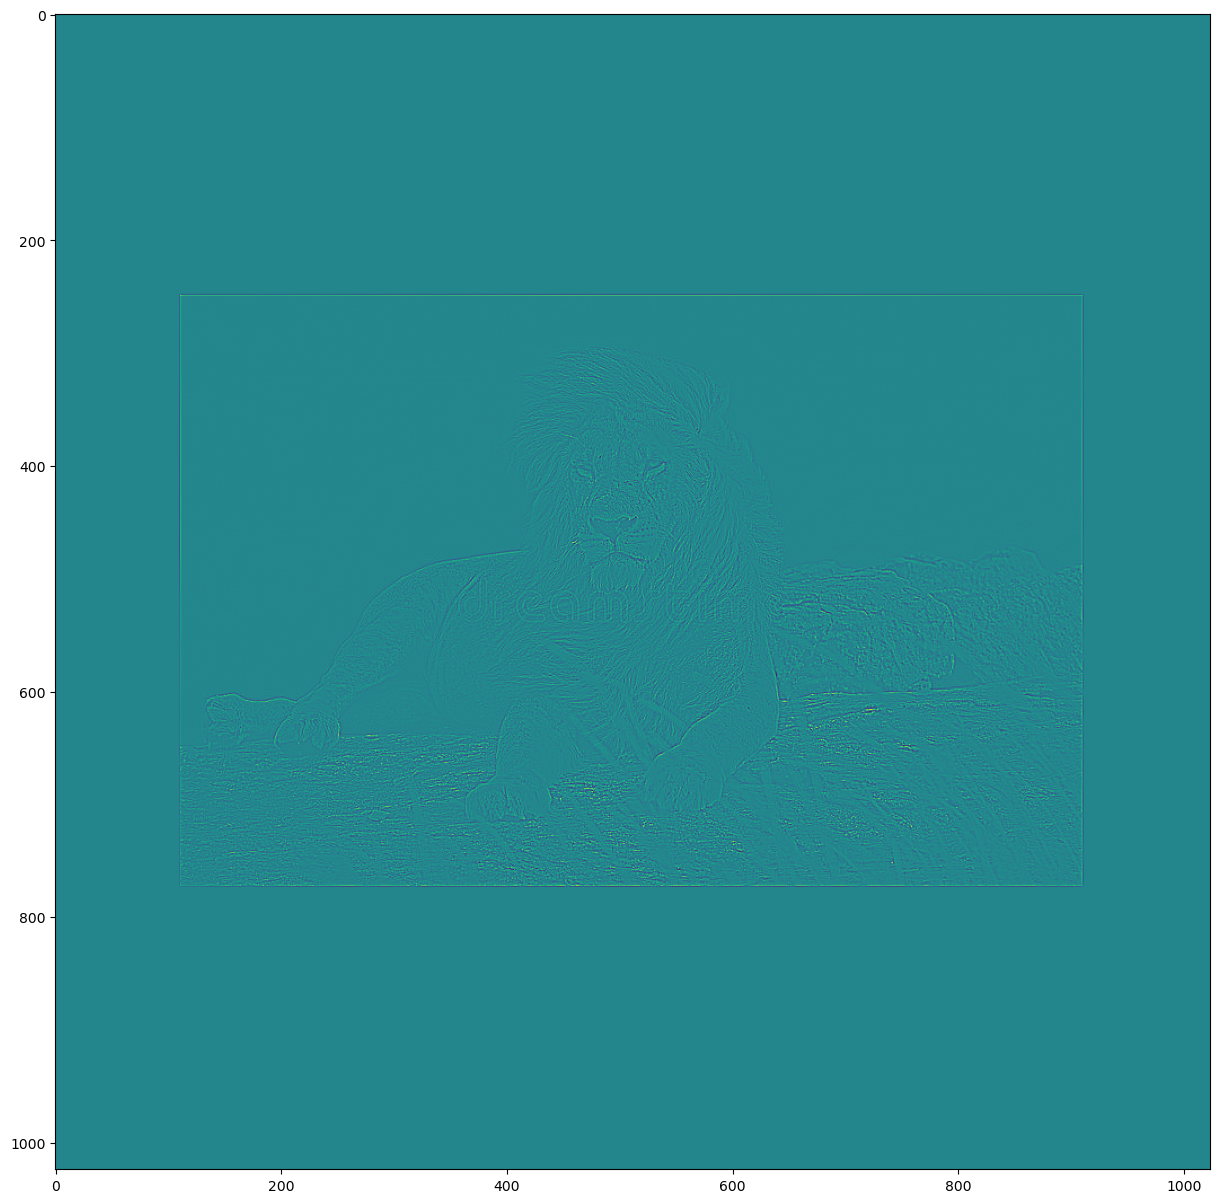

In [264]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.imshow(fft.fftshift(data[:, :, 0]))

In [192]:
res = DIFfft(np.arange(8, dtype = "complex"))
# res = inv_DITfft(res)
np.stack((np.real(res), np.imag(res)), axis = 1)

array([[28.        ,  0.        ],
       [-4.        ,  0.        ],
       [-4.        ,  4.        ],
       [-4.        , -4.        ],
       [-4.        ,  9.65685425],
       [-4.        , -1.65685425],
       [-4.        ,  1.65685425],
       [-4.        , -9.65685425]])

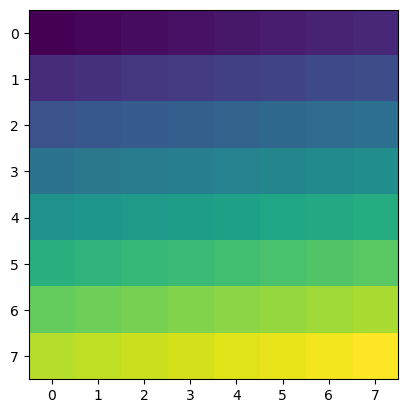

In [376]:
plt.imshow(np.arange(8*8).reshape(8, 8))

In [436]:
# %%timeit
for i in range(100):
    res = fft.fft2(np.arange(512*512).reshape(512, 512))
    ires = fft.ifft2(res)
# np.stack((np.real(res), np.imag(res)), axis = 1)

In [429]:
np.real(ires).astype(int)

array([[     0,      1,      2, ...,    509,    510,    511],
       [   512,    513,    514, ...,   1021,   1022,   1023],
       [  1023,   1024,   1025, ...,   1532,   1533,   1534],
       ...,
       [260608, 260609, 260610, ..., 261117, 261118, 261119],
       [261120, 261121, 261122, ..., 261629, 261630, 261631],
       [261632, 261633, 261634, ..., 262141, 262142, 262143]])

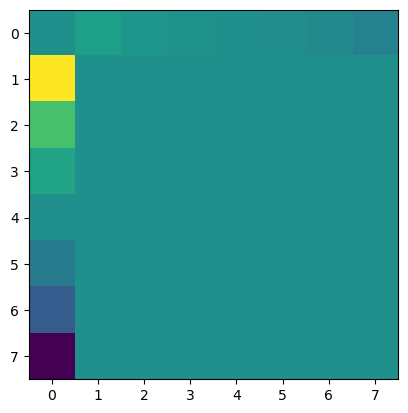

In [407]:
plt.imshow(np.imag(res))

In [29]:
data[:, :, 1]

array([[43., 43., 43., 43., 43., 43., 43., 43.],
       [43., 43., 43., 43., 43., 43., 43., 43.],
       [43., 43., 43., 43., 43., 43., 43., 43.],
       [43., 43., 43., 43., 43., 43., 43., 43.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.]], dtype=float32)

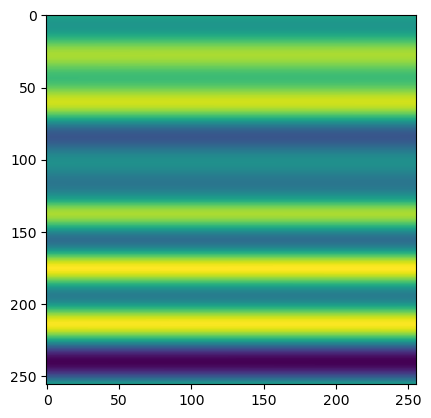

In [90]:
plt.imshow(data[:, :, 1])

In [152]:
np.abs(fft.fft2(data[:, :, 0]))

array([[2.1474509e+09, 2.6702438e+06, 1.3352225e+06, ..., 8.9026000e+05,
        1.3352225e+06, 2.6702438e+06],
       [6.8358246e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.4181693e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.2790658e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.4181693e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.8358246e+08, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

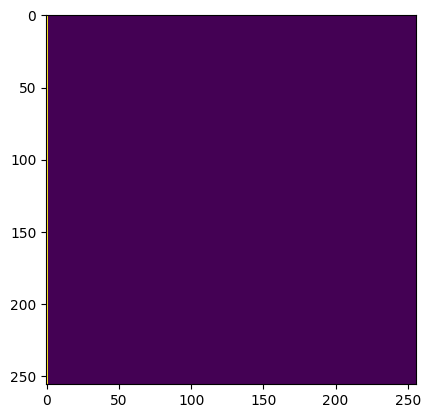

In [151]:
plt.imshow(np.abs(fft.fft2(data[:, :, 0])), vmin = 0, vmax = 1)

In [47]:
data[1, :, 0]

array([256., 257., 258., 259., 260., 261., 262., 263., 264., 265., 266.,
       267., 268., 269., 270., 271., 272., 273., 274., 275., 276., 277.,
       278., 279., 280., 281., 282., 283., 284., 285., 286., 287., 288.,
       289., 290., 291., 292., 293., 294., 295., 296., 297., 298., 299.,
       300., 301., 302., 303., 304., 305., 306., 307., 308., 309., 310.,
       311., 312., 313., 314., 315., 316., 317., 318., 319., 320., 321.,
       322., 323., 324., 325., 326., 327., 328., 329., 330., 331., 332.,
       333., 334., 335., 336., 337., 338., 339., 340., 341., 342., 343.,
       344., 345., 346., 347., 348., 349., 350., 351., 352., 353., 354.,
       355., 356., 357., 358., 359., 360., 361., 362., 363., 364., 365.,
       366., 367., 368., 369., 370., 371., 372., 373., 374., 375., 376.,
       377., 378., 379., 380., 381., 382., 383., 384., 385., 386., 387.,
       388., 389., 390., 391., 392., 393., 394., 395., 396., 397., 398.,
       399., 400., 401., 402., 403., 404., 405., 40